# Match-filtering SNR v.s Amplitude-over-variance SNR

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
file_address = './data_SNRmf/'
data = {}
for type_ in ['train', 'test']:
    for file in ['%s_SNRmf_%s.csv' %(type_, i) for i in range(1, 11)]:
        data['%s_%s' %(type_, file.split('.')[0].split('_')[-1])] = pd.read_csv(file_address + file, 
                                                                                header=None)

data.keys()

dict_keys(['train_1', 'train_2', 'train_3', 'train_4', 'train_5', 'train_6', 'train_7', 'train_8', 'train_9', 'train_10', 'test_1', 'test_2', 'test_3', 'test_4', 'test_5', 'test_6', 'test_7', 'test_8', 'test_9', 'test_10'])

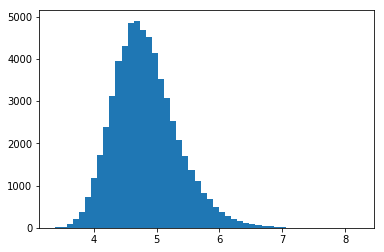

4.826940708332831


In [10]:
# plt.figure(figsize=(15,15))
plt.hist(data['train_1'].values[:,1].tolist(), bins = 50)
plt.show()
print(data['train_1'].values[:,1].mean())

5.233368525689253
5.160677699989758
5.085883928899126
5.1616683085564645
5.157713978830782
5.132572873811893
5.167303897706463
5.137524369947474
5.182973843013832
5.142550188184117


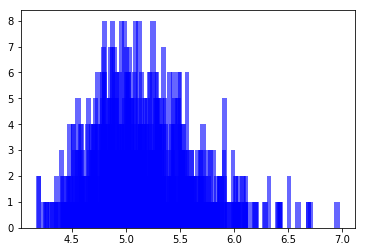

In [18]:
tt = data['train_1'].iloc[:,0]
for mass in tt.unique()[:10]:
    data_ = data['train_1'][data['train_1'].iloc[:,0] == mass]
    plt.hist(data_.values[:,1].tolist(), bins = 50, color='b', alpha=0.6)
    print(data_.values[:,1].mean())

4.773915635808653
4.638973253948733
4.760282889386312
4.731012059166329
4.754478474572082
4.683339074843394
4.686685697032726
4.711102105149762
4.869801810004876
4.673346657708272


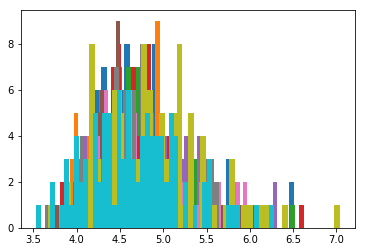

In [20]:
tt = data['train_1'].iloc[:,0]
for mass in tt.unique()[-10:]:
    data_ = data['train_1'][data['train_1'].iloc[:,0] == mass]
    plt.hist(data_.values[:,1].tolist(), bins = 50)
    print(data_.values[:,1].mean())

In [ ]:
# data['train_1'][[0]]. == '5.00|5.50'